# Intro
In this Notebook we are trying to predict the prices of next 30 days for a use-inputed commodity

docs - https://medium.com/swlh/stock-price-prediction-with-pytorch-37f52ae84632
    -https://colab.research.google.com/drive/198onOBeHXWIc-rZmbDa1yGo2wHV7GGMD?authuser=1#scrollTo=hE8PXzX2cXp3

# Starting with a small dataset

In [ ]:
from google.colab import files
files.upload()

Saving rs_session-241_as43_1.2.csv to rs_session-241_as43_1.2.csv


{'rs_session-241_as43_1.2.csv': b'Commodities,Price As On - 15/11/2016,1 Year Ago - 15/11/2015,2 years Ago - 14/11/2014,3 Years Ago - 14/11/2013,% Variation over - 1 Year,% Variation over - 2 Year,% Variation over - 3 Year\r\nRice,27.51,27.7,27.85,27.85,-0.69,-1.22,-1.22\r\nWheat,23.96,24.69,21.96,20.62,-2.96,9.11,16.2\r\nAtta (Wheat),25.9,24.19,23.75,22.95,7.07,9.05,12.85\r\nGram Dal,121.87,70,45.69,50.52,74.1,166.73,141.23\r\nArhar Dal,118.63,154.24,74.81,70.42,-23.09,58.58,68.46\r\nUrad Dal,119.55,145.06,75.64,63.03,-17.59,58.05,89.67\r\nMoong Dal,83.85,108.91,93.32,75.61,-23.01,-10.15,10.9\r\nMasoor Dal,81.8,89.25,71.15,59.25,-8.35,14.97,38.06\r\nSugar,40.7,30.67,35.72,35.4,32.7,13.94,14.97\r\nMilk (Rs/Ltr),40.31,36.06,38.12,35.11,11.79,5.75,14.81\r\nGroundnut Oil,133.81,124.08,119.17,124.26,7.84,12.28,7.69\r\nMustard Oil,109.55,114.89,97.09,97.71,-4.65,12.83,12.12\r\nVanaspati,76,71.16,75.47,76.15,6.8,0.7,-0.2\r\nSoya Oil,83.54,78.86,83.77,84.37,5.93,-0.27,-0.98\r\nSunflower Oil,9

# Getting to Know the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv('/content/rs_session-241_as43_1.2.csv', parse_dates=True,infer_datetime_format=True)
df

<ipython-input-35-832f92f316ea>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/rs_session-241_as43_1.2.csv', parse_dates=True,infer_datetime_format=True)


,Commodities,Price As On - 15/11/2016,1 Year Ago - 15/11/2015,2 years Ago - 14/11/2014,3 Years Ago - 14/11/2013,% Variation over - 1 Year,% Variation over - 2 Year,% Variation over - 3 Year
0,Rice,27.51,27.70,27.85,27.85,-0.69,-1.22,-1.22
1,Wheat,23.96,24.69,21.96,20.62,-2.96,9.11,16.20
2,Atta (Wheat),25.90,24.19,23.75,22.95,7.07,9.05,12.85
3,Gram Dal,121.87,70.00,45.69,50.52,74.10,166.73,141.23
4,Arhar Dal,118.63,154.24,74.81,70.42,-23.09,58.58,68.46
5,Urad Dal,119.55,145.06,75.64,63.03,-17.59,58.05,89.67
6,Moong Dal,83.85,108.91,93.32,75.61,-23.01,-10.15,10.90
7,Masoor Dal,81.80,89.25,71.15,59.25,-8.35,14.97,38.06
8,Sugar,40.70,30.67,35.72,35.40,32.70,13.94,14.97
9,Milk (Rs/Ltr),40.31,36.06,38.12,35.11,11.79,5.75,14.81


In [ ]:
df['Commodities']

,Commodities
0,Rice
1,Wheat
2,Atta (Wheat)
3,Gram Dal
4,Arhar Dal
5,Urad Dal
6,Moong Dal
7,Masoor Dal
8,Sugar
9,Milk (Rs/Ltr)


In [ ]:
df.shape

(22, 8)

In [ ]:
Class = df.loc[:, 'Commodities']
Class

,Commodities
0,Rice
1,Wheat
2,Atta (Wheat)
3,Gram Dal
4,Arhar Dal
5,Urad Dal
6,Moong Dal
7,Masoor Dal
8,Sugar
9,Milk (Rs/Ltr)


In [ ]:
y = df.iloc[:, 1:5]
y

,Price As On - 15/11/2016,1 Year Ago - 15/11/2015,2 years Ago - 14/11/2014,3 Years Ago - 14/11/2013
0,27.51,27.70,27.85,27.85
1,23.96,24.69,21.96,20.62
2,25.90,24.19,23.75,22.95
3,121.87,70.00,45.69,50.52
4,118.63,154.24,74.81,70.42
5,119.55,145.06,75.64,63.03
6,83.85,108.91,93.32,75.61
7,81.80,89.25,71.15,59.25
8,40.70,30.67,35.72,35.40
9,40.31,36.06,38.12,35.11


<Axes: >

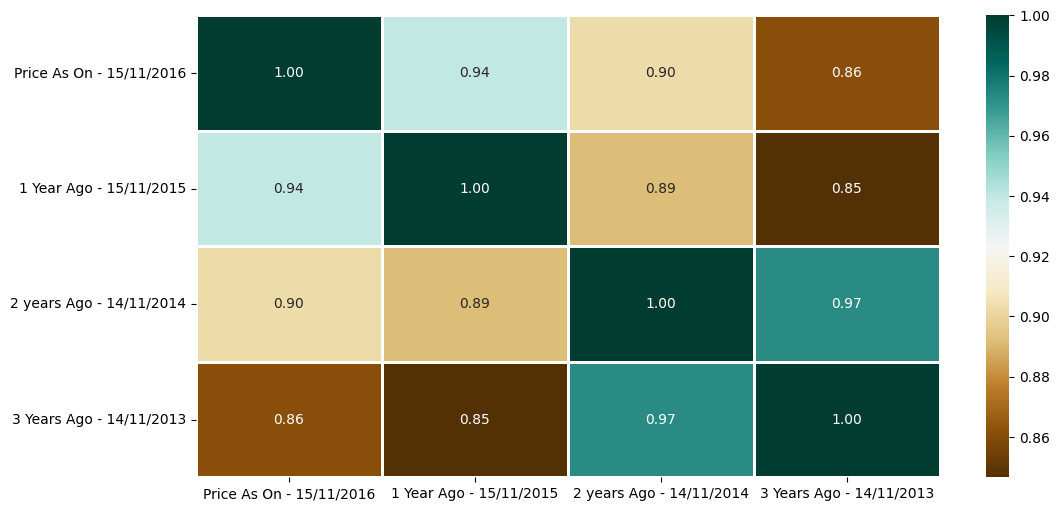

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(y.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [ ]:
y.isnull().sum()

,0
Price As On - 15/11/2016,0
1 Year Ago - 15/11/2015,0
2 years Ago - 14/11/2014,0
3 Years Ago - 14/11/2013,0


#Working with Another dataset from Department of Consumer Affairs (DOCA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
from google.colab import files
files.upload()

Saving 2023_West_Bengal_Commodities.csv to 2023_West_Bengal_Commodities.csv


{'2023_West_Bengal_Commodities.csv': b'id,date,commodity_group,commodity_id,commodity,zone,centre_id,centre,price\n12490024,2023-01-02,Others,6,"Milk @","East Zone",588,"West Bengal",49.5\n12489345,2023-01-01,"Grains & Pulses",1,"Atta (Wheat)","East Zone",588,"West Bengal",34.33\n12489368,2023-01-01,"Grains & Pulses",2,"Gram Dal","East Zone",588,"West Bengal",72.67\n12489387,2023-01-01,"Edible Oils",3,"Groundnut Oil (Packed)","East Zone",588,"West Bengal",187\n12489481,2023-01-01,"Grains & Pulses",7,"Moong Dal","East Zone",588,"West Bengal",110.33\n12489504,2023-01-01,"Edible Oils",8,"Mustard Oil (Packed)","East Zone",588,"West Bengal",168.33\n12489528,2023-01-01,Vegetables,9,Onion,"East Zone",588,"West Bengal",27.67\n12489644,2023-01-01,"Edible Oils",14,"Soya Oil (Packed)","East Zone",588,"West Bengal",153\n12489668,2023-01-01,Others,15,Sugar,"East Zone",588,"West Bengal",44\n12489691,2023-01-01,"Edible Oils",16,"Sunflower Oil (Packed)","East Zone",588,"West Bengal",167.67\n12489862,2

In [ ]:
df = pd.read_csv("/content/2023_West_Bengal_Commodities.csv", parse_dates=True,infer_datetime_format=True)
df.head()

<ipython-input-5-354a0e030764>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("/content/2023_West_Bengal_Commodities.csv", parse_dates=True,infer_datetime_format=True)


,id,date,commodity_group,commodity_id,commodity,zone,centre_id,centre,price
0,12490024,2023-01-02,Others,6,Milk @,East Zone,588,West Bengal,49.50
1,12489345,2023-01-01,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,34.33
2,12489368,2023-01-01,Grains & Pulses,2,Gram Dal,East Zone,588,West Bengal,72.67
3,12489387,2023-01-01,Edible Oils,3,Groundnut Oil (Packed),East Zone,588,West Bengal,187.00
4,12489481,2023-01-01,Grains & Pulses,7,Moong Dal,East Zone,588,West Bengal,110.33


In [ ]:
df['commodity'].unique()

array(['Milk @', 'Atta (Wheat)', 'Gram Dal', 'Groundnut Oil (Packed)',
       'Moong Dal', 'Mustard Oil (Packed)', 'Onion', 'Soya Oil (Packed)',
       'Sugar', 'Sunflower Oil (Packed)', 'Gur', 'Masoor Dal',
       'Palm Oil (Packed)', 'Potato', 'Rice', 'Salt Pack (Iodised)',
       'Tea Loose', 'Tomato', 'Tur/Arhar Dal', 'Urad Dal',
       'Vanaspati (Packed)', 'Wheat'], dtype=object)

In [ ]:
df.shape

(8030, 9)

In [ ]:
y_Atta = df[df['commodity'] == 'Atta (Wheat)']
y_Atta.head()

,id,date,commodity_group,commodity_id,commodity,zone,centre_id,centre,price
1,12489345,2023-01-01,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,34.33
10,12489862,2023-01-02,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,35.00
40,12490580,2023-01-03,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,35.00
73,12492035,2023-01-05,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,35.00
88,12492773,2023-01-06,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,35.00


In [ ]:
y_Atta.tail()

,id,date,commodity_group,commodity_id,commodity,zone,centre_id,centre,price
7921,10743665,2023-11-26,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,38.00
7939,10744271,2023-11-27,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,38.00
7962,10744942,2023-11-28,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,38.04
7992,10745658,2023-11-29,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,38.04
8004,10746373,2023-11-30,Grains & Pulses,1,Atta (Wheat),East Zone,588,West Bengal,38.09


In [ ]:
Atta_prices = y_Atta.loc[:, 'price']
Atta_prices

,price
1,34.33
10,35.00
40,35.00
73,35.00
88,35.00
...,...
7921,38.00
7939,38.00
7962,38.04
7992,38.04


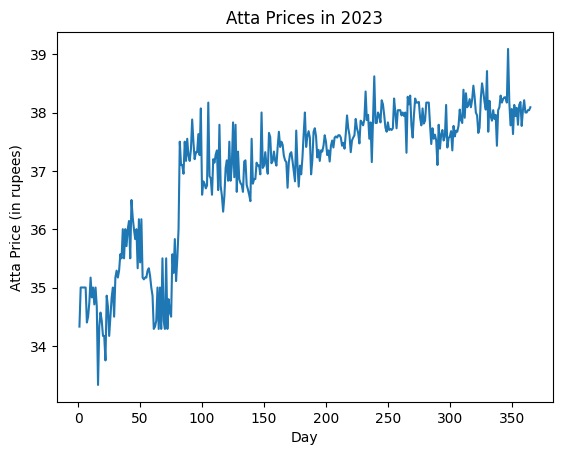

In [ ]:
plt.plot(range(1,366), Atta_prices)
plt.title('Atta Prices in 2023')
plt.xlabel('Day')
plt.ylabel('Atta Price (in rupees)')
plt.show()

# Trying to make the Commodity Selection Process User-dependent

Enter a commodity: Tomato
          id        date commodity_group  commodity_id commodity       zone  \
21  12489739  2023-01-01      Vegetables            18    Tomato  East Zone   
35  12490416  2023-01-02      Vegetables            18    Tomato  East Zone   
60  12491133  2023-01-03      Vegetables            18    Tomato  East Zone   
70  12491867  2023-01-04      Vegetables            18    Tomato  East Zone   
83  12492605  2023-01-05      Vegetables            18    Tomato  East Zone   

    centre_id       centre  price  
21        588  West Bengal  28.33  
35        588  West Bengal  28.33  
60        588  West Bengal  27.50  
70        588  West Bengal  26.17  
83        588  West Bengal  25.29  


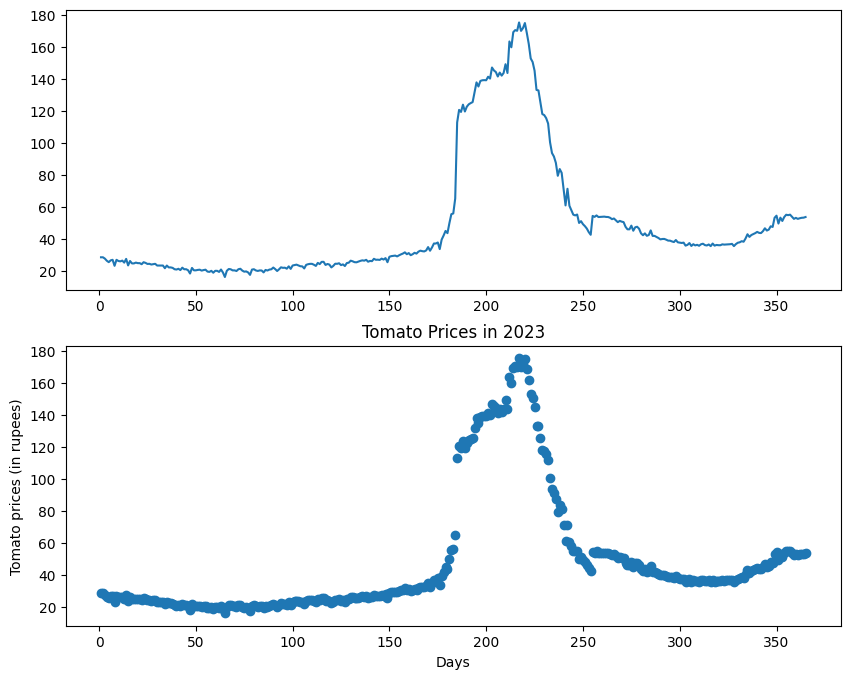

In [ ]:
x = str(input("Enter a commodity: "))

item_list = ['Milk @', 'Atta (Wheat)', 'Gram Dal', 'Groundnut Oil (Packed)',
       'Moong Dal', 'Mustard Oil (Packed)', 'Onion', 'Soya Oil (Packed)',
       'Sugar', 'Sunflower Oil (Packed)', 'Gur', 'Masoor Dal',
       'Palm Oil (Packed)', 'Potato', 'Rice', 'Salt Pack (Iodised)',
       'Tea Loose', 'Tomato', 'Tur/Arhar Dal', 'Urad Dal',
       'Vanaspati (Packed)', 'Wheat']

if x not in item_list:
  print(f" {x} is not an commodity peresent in DOCA database\n")
else:
  item_df = df[df['commodity'] == x]
  item_price = item_df.loc[:, 'price']
  print(item_df.head())

  fig, axs = plt.subplots(2, figsize=(10, 8))

  axs[0].plot(range(1,366), item_price)
  axs[1].scatter(range(1,366), item_price)
  plt.title(f'{x} Prices in 2023')
  plt.xlabel('Days')
  plt.ylabel(f'{x} prices (in rupees)')
  plt.show()


For the time being lets work with Atta Data only.

# Building a Baseline Model

In [ ]:
item_prices_df = item_df.reset_index()['price']
item_prices_df.head()

,price
0,28.33
1,28.33
2,27.50
3,26.17
4,25.29


## 1. Normalizing the values with Min Max Scaler as LSTM and GRU are very sensitive to data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # --> scales value to be between 0 and 1

ipdf = scaler.fit_transform(np.array(item_prices_df).reshape(-1,1))

In [ ]:
ipdf.shape, ipdf[:5]

((365, 1),
 array([[0.07741571],
        [0.07741571],
        [0.07220443],
        [0.06385383],
        [0.05832862]]))

## 2. Making the Data as Time-Series Data


Here we are basically converting our data to dependent and independent feature. The dependent data will depend on the timestep = n i.e data on previous n days

For Example prices are

Train_Data = {120, 130, 140, 150, 134}

Test_Data = {160, 190, 154, 155, 170}

If Timesteps = 3

    X_train(independent fearure) | y_train (dependent feature)

f1   f2    f3   |  o/p

120   130   140  |  150

130   140   150   | 134
.

.

.



for test_data

    X_test (independent fearure) |   y_test (dependent feature)

f1  f2  f3    o/p

160   190   154  |  155

190   154   155   | 170



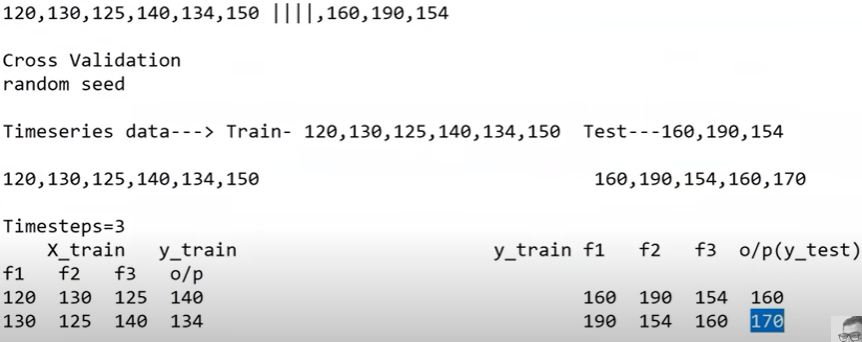

In [ ]:
train_size = int(len(ipdf) * 0.65)
test_size = int(len(ipdf) * 0.35)
train_data , test_data = ipdf[0: train_size, :], ipdf[train_size:len(ipdf), :1]

In [ ]:
train_data.shape, test_data.shape

((237, 1), (128, 1))

In [ ]:
def create_Time_Series_dataset(dataset, time_step=1):
  X, Y = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step), 0]    # i=0 to i=0, 1, 2, 3, ..... 99
    X.append(a)
    Y.append(dataset[i + time_step, 0]) # i=100
  return np.array(X), np.array(Y)

In [ ]:
time_step = 50
X_train, y_train = create_Time_Series_dataset(train_data, time_step)
X_test, y_test = create_Time_Series_dataset(test_data, time_step)

In [ ]:
X_train.shape, y_train.shape, X_test.shape , y_test.shape

((186, 50), (186,), (77, 50), (77,))

## 3. Reshape our data to 3 dimensions, as LSTM and GRU uses 3 dimensional data

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape, X_test.shape

((186, 50, 1), (77, 50, 1))

# 4. Creating the stacked LSTM model

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras import Sequential


In [ ]:
model = Sequential()
model.add(layers.LSTM(50, return_sequences=True, input_shape=(50,1)))
model.add(layers.LSTM(50, return_sequences=True))
model.add(layers.LSTM(50))
model.add(layers.Dense(1)) # a fully connected layer to dim=1

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X_train, y_train,
          validation_data=(X_train, y_train),
          epochs=50,
          batch_size=64,
          verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 606ms/step - loss: 0.1435 - val_loss: 0.0733
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - loss: 0.0601 - val_loss: 0.0333
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - loss: 0.0379 - val_loss: 0.0395
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 0.0323 - val_loss: 0.0210
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - loss: 0.0238 - val_loss: 0.0286
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0283 - val_loss: 0.0236
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0209 - val_loss: 0.0165
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0177 - val_loss: 0.0191
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 0.0191 - val_loss: 0.0178
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.0192 - val_loss: 0.0143
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0133 - val_loss: 0.0155
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.0159 - val_lo

In [ ]:
y_pred = model.predict(X_train)
test_pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [ ]:
y_pred = scaler.inverse_transform(y_pred)
test_pred = scaler.inverse_transform(test_pred)

y_pred, test_pred

(array([[ 21.96317 ],
        [ 21.650305],
        [ 21.381071],
        [ 21.142975],
        [ 20.936516],
        [ 20.76671 ],
        [ 20.604698],
        [ 20.430412],
        [ 20.252535],
        [ 20.049004],
        [ 19.84227 ],
        [ 19.647577],
        [ 19.45686 ],
        [ 19.304781],
        [ 19.161102],
        [ 18.939362],
        [ 18.700003],
        [ 18.50952 ],
        [ 18.397118],
        [ 18.353899],
        [ 18.36735 ],
        [ 18.414103],
        [ 18.504652],
        [ 18.645922],
        [ 18.805708],
        [ 18.945496],
        [ 19.04906 ],
        [ 19.094519],
        [ 19.037775],
        [ 18.949482],
        [ 18.879225],
        [ 18.834059],
        [ 18.807652],
        [ 18.802578],
        [ 18.816841],
        [ 18.816816],
        [ 18.82416 ],
        [ 18.840912],
        [ 18.881737],
        [ 18.956306],
        [ 19.092352],
        [ 19.272491],
        [ 19.44987 ],
        [ 19.62399 ],
        [ 19.823843],
        [ 

## 5. Scores to compare our predictions to Ground Truth

In [ ]:
# Calculate the scores for prediction
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

def error_score(y_pred, y_train):
  mse = mean_squared_error(y_train, y_pred)
  rmse = mean_squared_error(y_train, y_pred, squared=False)
  mae = mean_absolute_error(y_train, y_pred)
  r2 = r2_score(y_train, y_pred)
  mape = mean_absolute_percentage_error(y_train, y_pred)

  #first create the error dictionary
  error_scores = {
    'Metric' : ['Mean Squared Error',
                'Root Mean Square Error',
                'Mean Absolute Error',
                'R2 Score',
                'Mean Absolute Percentage Error'],
    'Scores' : [mse, rmse, mae, r2, mape]
  }

  train_error_scores_df = pd.DataFrame(error_scores)
  return train_error_scores_df

error_score(y_pred, y_train)

,Metric,Scores
0,Mean Squared Error,6.198436e+03
1,Root Mean Square Error,7.873015e+01
2,Mean Absolute Error,5.903687e+01
3,R2 Score,-5.840029e+04
4,Mean Absolute Percentage Error,4.639459e+14


In [ ]:
error_score(test_pred, y_test)

,Metric,Scores
0,Mean Squared Error,3.642711e+03
1,Root Mean Square Error,6.035488e+01
2,Mean Absolute Error,5.978618e+01
3,R2 Score,-2.159642e+06
4,Mean Absolute Percentage Error,3.798643e+02


In [ ]:
# Calculate the scores for prediction
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


mse = mean_squared_error(test_pred, y_test)
rmse = mean_squared_error(test_pred, y_test, squared=False)
mae = mean_absolute_error(test_pred, y_test)
r2 = r2_score(test_pred, y_test)
mape = mean_absolute_percentage_error(test_pred, y_test)

#first create the error dictionary
error_scores = {
    'Metric' : ['Mean Squared Error',
                'Root Mean Square Error',
                'Mean Absolute Error',
                'R2 Score'],
    'Scores' : [mse, rmse, mae, r2]
}

test_error_scores_df = pd.DataFrame(error_scores)
test_error_scores_df

NameError: name 'test_pred' is not defined

In [ ]:
r2_score(test_pred, y_test)

NameError: name 'r2_score' is not defined

## 6. Plotting the prediction

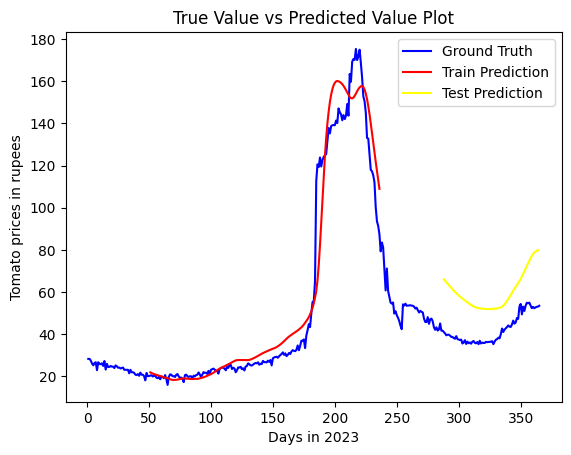

In [ ]:

def plot_pred(ipdf, y_pred, test_pred, look_back):
  look_back = 50
  trainPredictPlot = np.empty_like(ipdf)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(y_pred)+look_back , :] = y_pred

  testPredictPlot = np.empty_like(ipdf)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(y_pred)+(2*look_back)+1 : len(ipdf)-1 , :] = test_pred

  plt.plot(range(1,366), item_price, c='blue', label='Ground Truth')
  plt.plot(range(1,366), trainPredictPlot, c='red', label='Train Prediction')
  plt.plot(range(1,366), testPredictPlot, c='yellow', label='Test Prediction')
  plt.title('True Value vs Predicted Value Plot')
  plt.xlabel('Days in 2023')
  plt.ylabel(f'{x} prices in rupees')
  plt.legend()
  plt.show()

plot_pred(ipdf, y_pred, test_pred, look_back=50)

## Working on a new model architecture

Well our previous model was shit, atleast we can try other models such as GRU and LSTM with non-linearity

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define hyperparameters
units = 100  # Number of hidden units in LSTM layer
dropout_rate = 0.2
lr = 0.0001

# Create the model
modelV2 = Sequential()
modelV2.add(LSTM(units, input_shape=(50, 1), return_sequences=True, activation='relu'))
modelV2.add(Dropout(dropout_rate))
modelV2.add(LSTM(units, return_sequences=True, activation='relu'))
modelV2.add(Dropout(dropout_rate))
modelV2.add(LSTM(units, return_sequences=True, activation='relu'))
modelV2.add(Dropout(dropout_rate))
modelV2.add(LSTM(units, return_sequences=False, activation='relu'))
modelV2.add(Dropout(dropout_rate))
modelV2.add(Dense(1, activation='linear'))  # Predicting a single value (stock price)

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
modelV2.compile(loss='mse', optimizer=optimizer)

modelV2.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_50 (LSTM)                       │ (None, 50, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_51 (LSTM)                       │ (None, 50, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_52 (LSTM)                       │ (None, 50, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_53 (LSTM)                       │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,101 (1.08 MB)

 Trainable params: 282,101 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelV2.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=64,
          verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - loss: 0.0482 - val_loss: 0.0042
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0466 - val_loss: 0.0039
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0442 - val_loss: 0.0036
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0439 - val_loss: 0.0033
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0438 - val_loss: 0.0030
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0433 - val_loss: 0.0027
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0393 - val_loss: 0.0024
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0395 - val_loss: 0.0021
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0371 - val_loss: 0.0017
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0360 - val_loss: 0.0014
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0324 - val_loss: 0.0011
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0310 - val_los

In [ ]:
y_pred = modelV2.predict(X_train)
test_pred = modelV2.predict(X_test)

y_pred = scaler.inverse_transform(y_pred)
test_pred = scaler.inverse_transform(test_pred)

y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 284ms/step


array([[113.24779 ],
       [112.87236 ],
       [112.57302 ],
       [112.307594],
       [112.05326 ],
       [111.83911 ],
       [111.630394],
       [111.445305],
       [111.20401 ],
       [111.045425],
       [110.8907  ],
       [110.75823 ],
       [110.64025 ],
       [110.53188 ],
       [110.41416 ],
       [110.31221 ],
       [110.24369 ],
       [110.17183 ],
       [110.11713 ],
       [110.06266 ],
       [110.01366 ],
       [109.97386 ],
       [109.95321 ],
       [109.92794 ],
       [109.91933 ],
       [109.92501 ],
       [109.93944 ],
       [109.95962 ],
       [109.98631 ],
       [110.01053 ],
       [110.03934 ],
       [110.07004 ],
       [110.09881 ],
       [110.12165 ],
       [110.13591 ],
       [110.146645],
       [110.140915],
       [110.12978 ],
       [110.07947 ],
       [110.00983 ],
       [109.93316 ],
       [109.827866],
       [109.703804],
       [109.57559 ],
       [109.43107 ],
       [109.28411 ],
       [109.13159 ],
       [108.9

In [ ]:
train_error_score_df = error_score(y_pred, y_train)
test_error_score_df = error_score(test_pred, y_test)

train_error_score_df, test_error_score_df

(                   Metric        Scores
 0      Mean Squared Error  11261.627249
 1  Root Mean Square Error    106.120814
 2     Mean Absolute Error    106.081413
 3                R2 Score  -1278.863378,
                    Metric         Scores
 0      Mean Squared Error   10322.637975
 1  Root Mean Square Error     101.600384
 2     Mean Absolute Error     101.600239
 3                R2 Score -382183.394406)

(                   Metric        Scores
 0      Mean Squared Error  11265.291713
 1  Root Mean Square Error    106.138079
 2     Mean Absolute Error    106.097154
 3                R2 Score  -1232.192442,
                    Metric         Scores
 0      Mean Squared Error   10268.832657
 1  Root Mean Square Error     101.335249
 2     Mean Absolute Error     101.334964
 3                R2 Score -179614.944281)

(                   Metric        Scores
 0      Mean Squared Error  11371.200838
 1  Root Mean Square Error    106.635833
 2     Mean Absolute Error    106.589544
 3                R2 Score  -1097.481620,
                    Metric         Scores
 0      Mean Squared Error   10241.698754
 1  Root Mean Square Error     101.201278
 2     Mean Absolute Error     101.200783
 3                R2 Score -100110.941332)

(                   Metric        Scores
 0      Mean Squared Error  11303.161792
 1  Root Mean Square Error    106.316329
 2     Mean Absolute Error    106.270486
 3                R2 Score  -1104.383128,
                    Metric        Scores
 0      Mean Squared Error  10200.428955
 1  Root Mean Square Error    100.997173
 2     Mean Absolute Error    100.996646
 3                R2 Score -92942.139119)

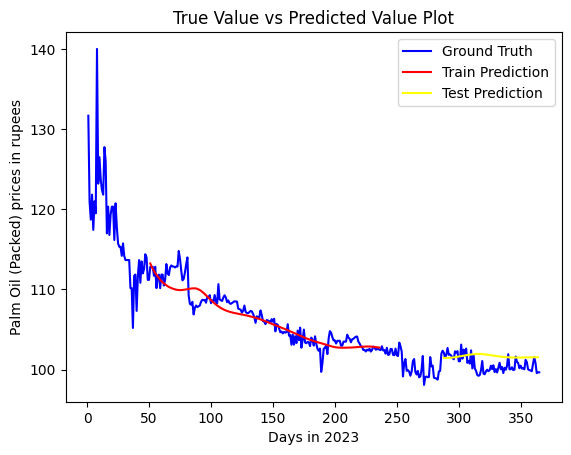

In [ ]:
plot_pred(ipdf, y_pred, test_pred, look_back=50)

Experimenting with time_steps

Getting shape error when time_step >= 100

In [ ]:
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout
units=100
dr = 0.2
lr = 0.0001

modelV3 = Sequential()
modelV3.add(GRU(units, input_shape=(50,1), return_sequences=True, activation='relu'))
modelV3.add(Dropout(dr))
modelV3.add(GRU(units, return_sequences=False, activation='relu'))
modelV3.add(Dropout(dr))
modelV3.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
modelV3.compile(loss='mse', optimizer=optimizer)

modelV3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 50, 100)             │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,601 (357.82 KB)

 Trainable params: 91,601 (357.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = modelV3.fit(X_train, y_train,
          validation_data=(X_test, y_test), #X_test, y_test
          epochs=100,
          batch_size=64,
          verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 499ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 217ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - loss: 0.0029 - val_loss: 0.0038
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 225ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - loss: 0.0026 - val_loss: 0.0036
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 0.0025 - val_loss: 0.0035
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - loss: 0.0029 - val_loss: 0.0039
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 0.0

In [ ]:
y_pred = modelV3.predict(X_train)
test_pred = modelV3.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
test_pred = scaler.inverse_transform(test_pred)

y_pred[:10]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[20.48302 ],
       [20.486542],
       [20.521168],
       [20.497164],
       [20.489403],
       [20.519022],
       [20.428564],
       [20.28356 ],
       [20.205894],
       [20.05883 ]], dtype=float32)

In [ ]:
y_pred.shape, test_pred.shape

((186, 1), (77, 1))

In [ ]:
train_error_score_df = error_score(y_pred, y_train)
test_error_score_df = error_score(test_pred, y_test)

print(f"Train Error Metric: {train_error_score_df} \n\n\nTest Error Metric: {test_error_score_df}")

Train Error Metric:                            Metric        Scores
0              Mean Squared Error  5.884789e+03
1          Root Mean Square Error  7.671238e+01
2             Mean Absolute Error  5.695755e+01
3                        R2 Score -5.544512e+04
4  Mean Absolute Percentage Error  4.856765e+14 


Test Error Metric:                            Metric        Scores
0              Mean Squared Error  2.804227e+03
1          Root Mean Square Error  5.295495e+01
2             Mean Absolute Error  5.180316e+01
3                        R2 Score -1.662532e+06
4  Mean Absolute Percentage Error  3.227737e+02


Train Error Metric:                    Metric        Scores

0      Mean Squared Error  11393.035706

1  Root Mean Square Error    106.738164

2     Mean Absolute Error    106.689692

3                R2 Score  -1048.756028


Test Error Metric:                    Metric         Scores

0      Mean Squared Error   10322.637975

1  Root Mean Square Error     101.600384

2     Mean Absolute Error     101.600239

3                R2 Score -382183.394406


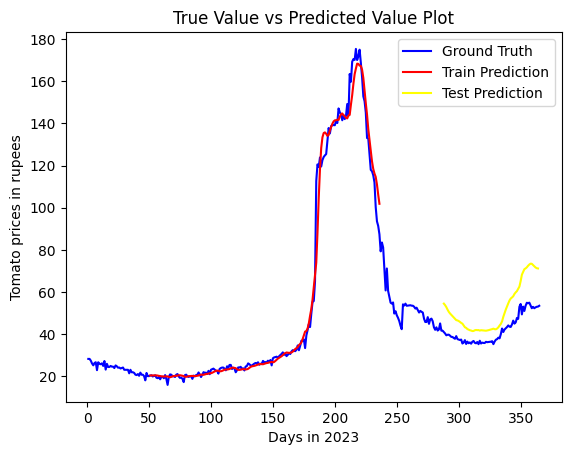

In [ ]:
plot_pred(ipdf, y_pred, test_pred, look_back=50)

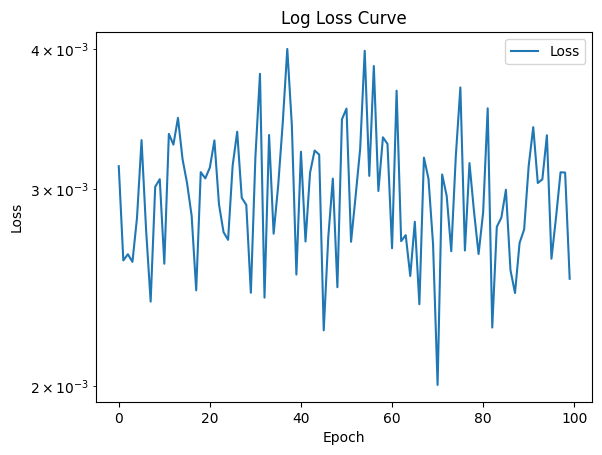

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Loss')
  plt.title('Log Loss Curve')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.yscale('log')
  plt.legend()
  plt.show()

plot_loss(history)

Lowering lr improved test data prediction a bit

Model with GRU layer did a lot better than LSTM

In [ ]:
from keras.layers import GRU
units=100
dr = 0.2
lr = 0.001

modelV4 = Sequential()
modelV4.add(GRU(units, input_shape=(50,1), return_sequences=True, activation='relu'))
modelV4.add(Dropout(dr))
modelV4.add(GRU(units, return_sequences=True, activation='relu'))
modelV4.add(Dropout(dr))
modelV4.add(GRU(units, return_sequences=True, activation='relu'))
modelV4.add(Dropout(dr))
modelV4.add(GRU(units, return_sequences=False, activation='relu'))
modelV4.add(Dropout(dr))
modelV4.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
modelV4.compile(loss='mse', optimizer=optimizer)

modelV4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_7 (GRU)                          │ (None, 50, 100)             │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_8 (GRU)                          │ (None, 50, 100)             │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_9 (GRU)                          │ (None, 50, 100)             │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_10 (GRU)                         │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,801 (831.25 KB)

 Trainable params: 212,801 (831.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelV4.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=64,
          verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - loss: 0.1773 - val_loss: 0.0147
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 438ms/step - loss: 0.1234 - val_loss: 0.0028
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step - loss: 0.0952 - val_loss: 0.0103
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 437ms/step - loss: 0.0649 - val_loss: 0.0457
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 441ms/step - loss: 0.0575 - val_loss: 0.0210
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step - loss: 0.0348 - val_loss: 0.0043
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 446ms/step - loss: 0.0228 - val_loss: 7.0958e-04
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 947ms/step - loss: 0.0135 - val_loss: 5.0638e-04
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 438ms/step - loss: 0.0168 - val_loss: 0.0029
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - loss: 0.0145 - val_loss: 0.0057
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 460ms/step - loss: 0.0160 - val_loss: 0.0042
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step - los

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Train Error Metric:                            Metric        Scores
0              Mean Squared Error  5.359206e+03
1          Root Mean Square Error  7.320660e+01
2             Mean Absolute Error  5.465010e+01
3                        R2 Score -5.049311e+04
4  Mean Absolute Percentage Error  4.777530e+14 


Test Error Metric:                            Metric        Scores
0              Mean Squared Error  2.193033e+03
1          Root Mean Square Error  4.682983e+01
2             Mean Absolute Error  4.626112e+01
3                        R2 Score -1.300176e+06
4  Mean Absolute Percentage Error  2.918707e+02


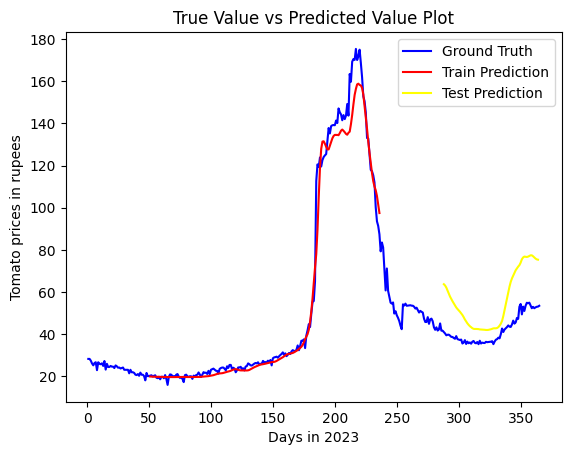

In [ ]:
y_pred = modelV4.predict(X_train)
test_pred = modelV4.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
test_pred = scaler.inverse_transform(test_pred)

y_pred[:10]

train_error_score_df = error_score(y_pred, y_train)
#test_error_score_df = error_score(test_pred, y_test)

print(f"Train Error Metric: {train_error_score_df} \n\n\nTest Error Metric: {test_error_score_df}")

plot_pred(ipdf, y_pred, test_pred, look_back=50)

## Selecting ModelV3
`Hence we can clearly see that modelV3 is fitting the Ground Truth Plot the best. We will go with the modelv3 for the time being`

We can also experiment with combining GRU and LSTM layers just for experimentation.

In [ ]:
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout
units=100
dr = 0.2
lr = 0.0001

modelV3 = Sequential()
modelV3.add(GRU(units, input_shape=(50,1), return_sequences=True, activation='relu'))
modelV3.add(Dropout(dr))
modelV3.add(GRU(units, return_sequences=False, activation='relu'))
modelV3.add(Dropout(dr))
modelV3.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
modelV3.compile(loss='mse', optimizer=optimizer)

modelV3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_13 (GRU)                         │ (None, 50, 100)             │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_14 (GRU)                         │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,601 (357.82 KB)

 Trainable params: 91,601 (357.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = modelV3.fit(X_train, y_train,
          validation_data=(X_test, y_test), #X_test, y_test
          epochs=100,
          batch_size=32,
          verbose=1)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - loss: 0.1771 - val_loss: 0.0248
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.1621 - val_loss: 0.0208
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.1584 - val_loss: 0.0173
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.1408 - val_loss: 0.0144
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.1087 - val_loss: 0.0118
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.1297 - val_loss: 0.0093
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.1085 - val_loss: 0.0070
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 0.0984 - val_loss: 0.0051
Epoch 9/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 0.0882 - val_loss: 0.0034
Epoch 10/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.0682 - val_loss: 0.0021
Epoch 11/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0790 - val_loss: 0.0012
Epoch 12/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0

In [ ]:
y_pred = modelV3.predict(X_train)
test_pred = modelV3.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
test_pred = scaler.inverse_transform(test_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
train_error_score_df = error_score(y_pred, y_train)
test_error_score_df = error_score(test_pred, y_test)
print(f"Train Error Metric: {train_error_score_df} \n\n\nTest Error Metric: {test_error_score_df}")

Train Error Metric:                            Metric        Scores
0              Mean Squared Error  5.527063e+03
1          Root Mean Square Error  7.434422e+01
2             Mean Absolute Error  5.543583e+01
3                        R2 Score -5.207465e+04
4  Mean Absolute Percentage Error  4.522581e+14 


Test Error Metric:                            Metric        Scores
0              Mean Squared Error  2.610969e+03
1          Root Mean Square Error  5.109764e+01
2             Mean Absolute Error  5.050661e+01
3                        R2 Score -1.547956e+06
4  Mean Absolute Percentage Error  3.189442e+02


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


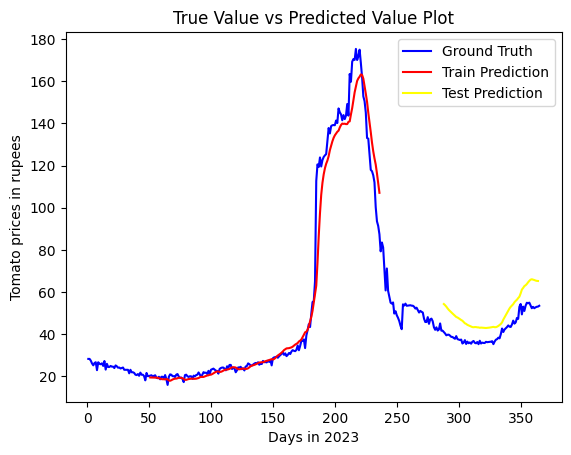

In [ ]:
y_pred = modelV3.predict(X_train)
test_pred = modelV3.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
test_pred = scaler.inverse_transform(test_pred)
plot_pred(ipdf, y_pred, test_pred, look_back=50)

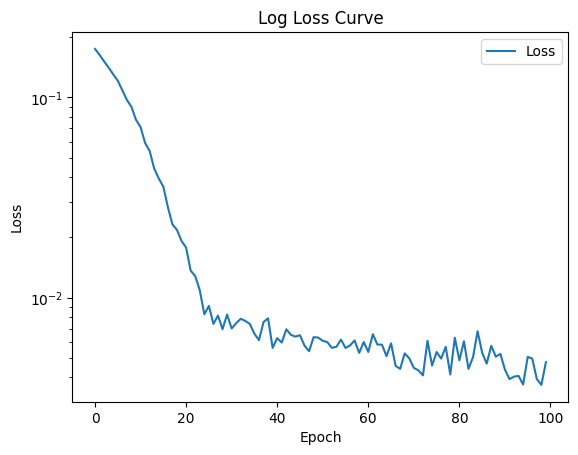

In [ ]:
plot_loss(history)

# Making Prediction for the next 30 days

In [ ]:
len(test_data)

128

In [ ]:
x_input = test_data[78:].reshape(1,-1) #reshaping the previous 100 days
x_input.shape

(1, 50)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
lst_output = []
n_steps = 50
i=0

while(i < 30):

  if(len(temp_input) > 30):
    x_input = np.array(temp_input[1:]) #shifting 1 position to right
    print(f"{i} day input {x_input}")
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape(1, n_steps-1, 1)    #Again reshaping it

    yhat = modelV3.predict(x_input, verbose=0)
    print(f"{i} day output {yhat}")
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

    lst_output.extend(yhat.tolist())    #adding predicted value to output list and previous input
    i = i+1

  else:
    x_input = x_input.reshape(1, n_steps, 1)  #reshape to use GRU/LSTM
    yhat = modelV3.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist()) #adding the predicted value to previous input
    temp_input = temp_input[1:]
    #print(len(temp_input))
    lst_output.extend(yhat.tolist())  #adding the predicted value to output list and previous input
    i = i+1

print(lst_output)

0 day input [0.13147485 0.12318704 0.12588686 0.12494506 0.1247567  0.12827274
 0.12720537 0.12777045 0.12852389 0.12871225 0.13015634 0.12136623
 0.12915175 0.13455139 0.13630941 0.14064168 0.13856972 0.15125259
 0.167891   0.15753124 0.16487725 0.16864444 0.17228606 0.17712061
 0.17335343 0.1725372  0.18007158 0.19137314 0.18245746 0.18616186
 0.19922145 0.19658442 0.23268663 0.24091166 0.20995793 0.23312614
 0.22012934 0.23570038 0.24455327 0.24298361 0.24486721 0.23657939
 0.22835437 0.23230991 0.22829158 0.23080304 0.23256106 0.23312614
 0.23557481]
0 day output [[0.3100135]]
1 day input [0.12318704 0.12588686 0.12494506 0.1247567  0.12827274 0.12720537
 0.12777045 0.12852389 0.12871225 0.13015634 0.12136623 0.12915175
 0.13455139 0.13630941 0.14064168 0.13856972 0.15125259 0.167891
 0.15753124 0.16487725 0.16864444 0.17228606 0.17712061 0.17335343
 0.1725372  0.18007158 0.19137314 0.18245746 0.18616186 0.19922145
 0.19658442 0.23268663 0.24091166 0.20995793 0.23312614 0.22012934


In [ ]:
day_new = np.arange(1, 51)
day_pred = np.arange(51, 81)

In [ ]:
len(ipdf)

365

In [ ]:
365 - 50

315

In [ ]:
ipdf2 = ipdf.tolist()
ipdf2.extend(lst_output)

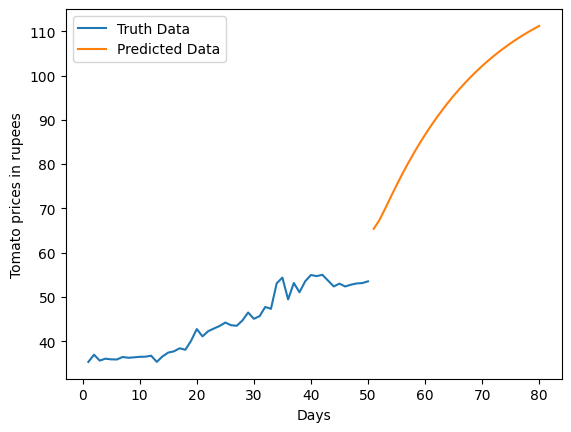

In [ ]:

plt.plot(day_new, scaler.inverse_transform(ipdf[315: ]), label="Truth Data") #previous 50 data - from 315 to 365 plot real data
plt.plot(day_pred, scaler.inverse_transform(lst_output), label="Predicted Data")
plt.legend()
plt.xlabel('Days')
plt.ylabel(f'{x} prices in rupees')
plt.show()


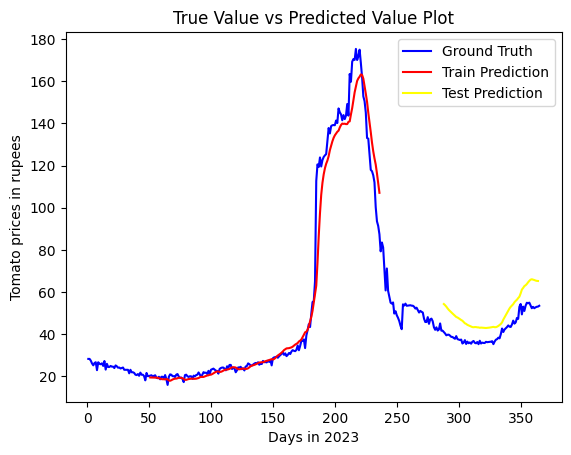

In [ ]:
plot_pred(ipdf, y_pred, test_pred, look_back=50)


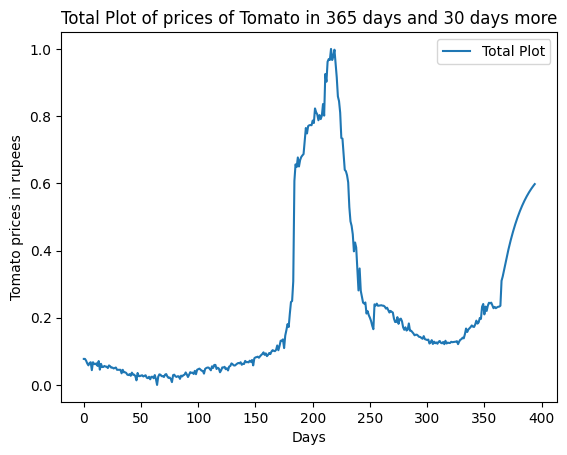

In [ ]:
ipdf2 = ipdf.tolist()
ipdf2.extend(lst_output)

plt.title(f'Total Plot of prices of {x} in 365 days and 30 days more')
plt.plot(ipdf2, label="Total Plot")
plt.xlabel('Days')
plt.ylabel(f'{x} prices in rupees')
plt.legend()
plt.show()

`Ways to improve the model - `
* Use a larger dataset (convert the csv files of 2023, 2022, 2021, 2020, 2019) to respective dfs and then concat the dfs to make a large dataset
* make the prediction of next 50 days using data of last 200 days
* Try bidirectional LSTM and GRU

# Improving the model

## 1. Using Larger dataset

In [ ]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
df20 = pd.read_csv("/content/2020_WB_22_commodities.csv", parse_dates = ['date'], index_col = 'date')
df21 = pd.read_csv("/content/2021_WB_22_commodities.csv", parse_dates = ['date'], index_col = 'date')
df22 = pd.read_csv("/content/2022_WB_22_commodities.csv", parse_dates = ['date'], index_col = 'date')
df23 = pd.read_csv("/content/2023_WB_22_commodities.csv", parse_dates = ['date'], index_col = 'date')

df = pd.concat([df20, df21, df22, df23])
df.tail()

,id,commodity_group,commodity_id,commodity,zone,centre_id,centre,price
date,,,,,,,,
2023-11-30,10746732,Grains & Pulses,12,Rice,East Zone,588,West Bengal,43.57
2023-11-30,10746926,Vegetables,18,Tomato,East Zone,588,West Bengal,53.52
2023-11-30,10746959,Grains & Pulses,19,Tur/Arhar Dal,East Zone,588,West Bengal,152.74
2023-11-30,10746992,Grains & Pulses,20,Urad Dal,East Zone,588,West Bengal,119.55
2023-11-29,10746340,Grains & Pulses,22,Wheat,East Zone,588,West Bengal,29.80


In [ ]:
df.to_csv('/content/2020_2023_WB_22_commodities.csv')

In [ ]:
df.shape, df20.shape, df21.shape, df22.shape, df23.shape

((32141, 8), (8052, 8), (8029, 8), (8030, 8), (8030, 8))

In [ ]:
df[df['commodity'] == 'Rice'].shape

(1461, 8)

In [ ]:
df.index.shape

(32141,)

In [ ]:
1461/365

4.002739726027397

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32141 entries, 2020-01-01 to 2023-11-29
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               32141 non-null  int64  
 1   commodity_group  32141 non-null  object 
 2   commodity_id     32141 non-null  int64  
 3   commodity        32141 non-null  object 
 4   zone             32141 non-null  object 
 5   centre_id        32141 non-null  int64  
 6   centre           32141 non-null  object 
 7   price            32141 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.2+ MB


In [ ]:
df.isnull().sum() #Hence our data does not contain any NaN values

,0
id,0
commodity_group,0
commodity_id,0
commodity,0
zone,0
centre_id,0
centre,0
price,0


Enter a commodity: Gram Dal
                  id  commodity_group  commodity_id commodity       zone  \
date                                                                       
2020-01-02  11827317  Grains & Pulses             2  Gram Dal  East Zone   
2020-01-01  11826703  Grains & Pulses             2  Gram Dal  East Zone   
2020-01-04  11828560  Grains & Pulses             2  Gram Dal  East Zone   
2020-01-03  11827912  Grains & Pulses             2  Gram Dal  East Zone   
2020-01-05  11829090  Grains & Pulses             2  Gram Dal  East Zone   

            centre_id       centre  price  
date                                       
2020-01-02        588  West Bengal  70.17  
2020-01-01        588  West Bengal  68.25  
2020-01-04        588  West Bengal  68.75  
2020-01-03        588  West Bengal  70.14  
2020-01-05        588  West Bengal  68.75  


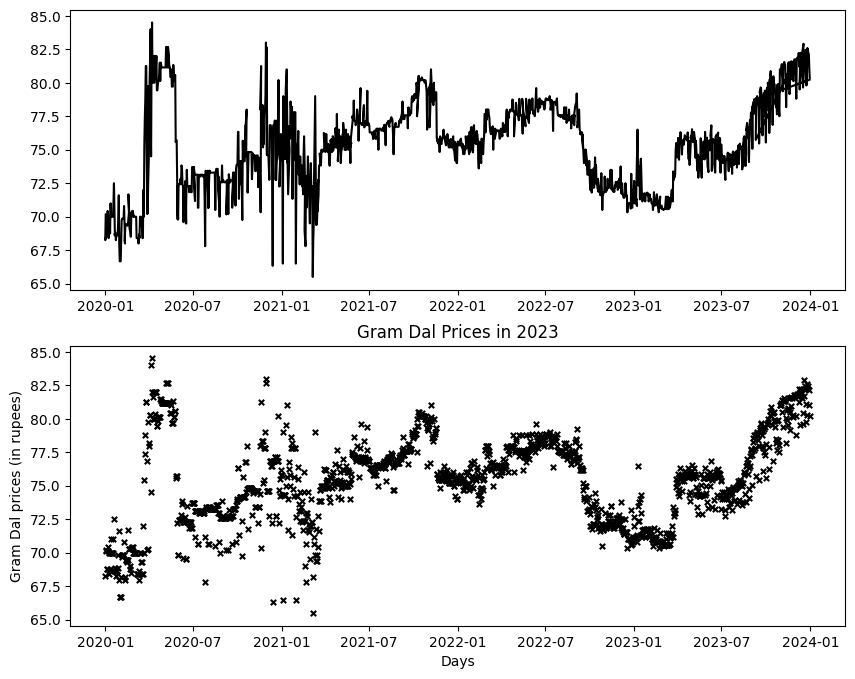

In [ ]:
# Maybe make it a function to make it cleaner
x = str(input("Enter a commodity: "))
item_list = ['Milk @', 'Atta (Wheat)', 'Gram Dal', 'Groundnut Oil (Packed)',
       'Moong Dal', 'Mustard Oil (Packed)', 'Onion', 'Soya Oil (Packed)',
       'Sugar', 'Sunflower Oil (Packed)', 'Gur', 'Masoor Dal',
       'Palm Oil (Packed)', 'Potato', 'Rice', 'Salt Pack (Iodised)',
       'Tea Loose', 'Tomato', 'Tur/Arhar Dal', 'Urad Dal',
       'Vanaspati (Packed)', 'Wheat']

if x not in item_list:
  print(f" {x} is not an commodity peresent in DOCA database\n")
else:
  item_df = df[df['commodity'] == x]
  item_price = item_df.loc[:, 'price']
  print(item_df.head())

  fig, axs = plt.subplots(2, figsize=(10, 8))

  plt.title(f'{x} Prices in 2023')
  axs[0].plot(item_df.index, item_price, c='black')
  axs[1].scatter(item_df.index,item_price,c='black', marker='x', s=15)
  plt.xlabel('Days')
  plt.ylabel(f'{x} prices (in rupees)')
  plt.show()

## 2. Split the train and test dataset

In [ ]:
df2 = item_df.reset_index()['price']
df2.shape

(1461,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
norm_df = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [ ]:
train_size = int(len(norm_df) * 0.65)
test_size = int(len(norm_df) * 0.35)

train_data , test_data = norm_df[0: train_size, :], norm_df[train_size:len(norm_df), :1]

In [ ]:
def create_Time_Series_dataset(dataset, time_step=1):
  X, Y = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i+time_step), 0]    # i=0 to i=0, 1, 2, 3, ..... 99
    X.append(a)
    Y.append(dataset[i + time_step, 0]) # i=100
  return np.array(X), np.array(Y)

time_step = 100
X_train, y_train = create_Time_Series_dataset(train_data, time_step)
X_test, y_test = create_Time_Series_dataset(test_data, time_step)

In [ ]:
X_train.shape, y_train.shape, X_test.shape , y_test.shape

((848, 100), (848,), (411, 100), (411,))

In [ ]:
# reshape to make it 3D data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

In [ ]:
units=100
dr = 0.2
lr = 0.01

modelV3 = Sequential()
modelV3.add(GRU(units, input_shape=(100,1), return_sequences=True, activation='relu'))
modelV3.add(Dropout(dr))
modelV3.add(GRU(units, return_sequences=True, activation='relu'))
modelV3.add(Dropout(dr))
modelV3.add(GRU(units, return_sequences=False, activation='relu'))
modelV3.add(Dropout(dr))
modelV3.add(Dense(1))

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
modelV3.compile(loss='mse', optimizer=optimizer)

modelV3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_6 (GRU)                          │ (None, 100, 100)            │          30,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_7 (GRU)                          │ (None, 100, 100)            │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_8 (GRU)                          │ (None, 100)                 │          60,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,201 (594.54 KB)

 Trainable params: 152,201 (594.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = modelV3.fit(X_train, y_train,
          validation_data=(X_test, y_test), #X_test, y_test
          epochs=100,
          batch_size=32,
          verbose=1)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 303ms/step - loss: 0.0726 - val_loss: 0.0213
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 339ms/step - loss: 0.0172 - val_loss: 0.0061
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 378ms/step - loss: 0.0101 - val_loss: 0.0046
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 279ms/step - loss: 0.0100 - val_loss: 0.0051
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 310ms/step - loss: 0.0086 - val_loss: 0.0043
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - loss: 0.0081 - val_loss: 0.0041
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 280ms/step - loss: 0.0089 - val_loss: 0.0041
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - loss: 0.0085 - val_loss: 0.0054
Epoch 9/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - loss: 0.0089 - val_loss: 0.0043
Epoch 10/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 279ms/step - loss: 0.0067 - val_loss: 0.0046
Epoch 11/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - loss: 0.0080 - val_loss: 0.0045
Epoch 12/100
27/27 ━━━━━━━━━━━━━━━━━

In [23]:
y_pred = modelV3.predict(X_train)
test_pred = modelV3.predict(X_test)

y_pred = scaler.inverse_transform(y_pred)
test_pred = scaler.inverse_transform(test_pred)


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step


In [24]:
y_pred.shape

(848, 1)

In [25]:
y_train.shape

(848,)

In [26]:
inv_y_train = scaler.inverse_transform(y_train.reshape(-1,1))
inv_y_train.shape

(848, 1)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

def error_score(y_pred, y_train):

  inv_y_train = scaler.inverse_transform(y_train.reshape(-1,1))

  mse = mean_squared_error(inv_y_train, y_pred)
  rmse = mean_squared_error(inv_y_train, y_pred, squared=False)
  mae = mean_absolute_error(inv_y_train, y_pred)
  r2 = r2_score(inv_y_train, y_pred)
  mape = mean_absolute_percentage_error(inv_y_train, y_pred)

  #first create the error dictionary
  error_scores = {
    'Metric' : ['Mean Squared Error',
                'Root Mean Square Error',
                'Mean Absolute Error',
                'R2 Score',
                'Mean Absolute Percentage Error'],
    'Scores' : [mse, rmse, mae, r2, mape]
  }

  train_error_scores_df = pd.DataFrame(error_scores)
  return train_error_scores_df

error_score(y_pred, y_train)

,Metric,Scores
0,Mean Squared Error,2.071912
1,Root Mean Square Error,1.439414
2,Mean Absolute Error,0.950587
3,R2 Score,0.715185
4,Mean Absolute Percentage Error,0.012634


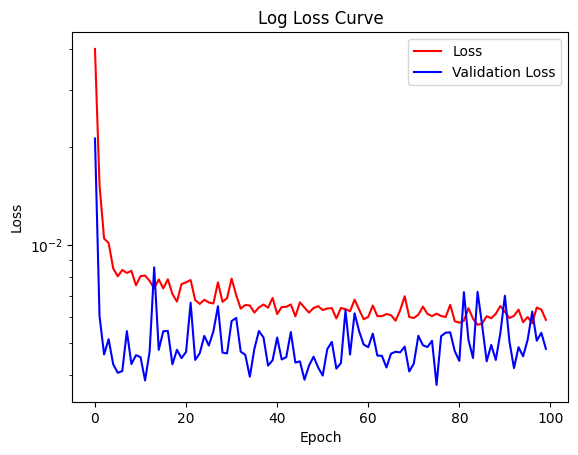

In [28]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='Loss', c='r')
  plt.plot(history.history['val_loss'], label='Validation Loss', c='b')
  plt.title('Log Loss Curve')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.yscale('log')
  plt.legend()
  plt.show()

plot_loss(history)

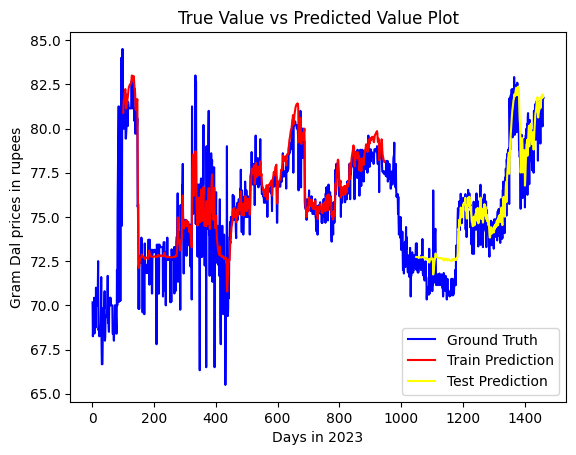

In [29]:
def plot_pred(df, y_pred, test_pred, look_back):
  trainPredictPlot = np.empty_like(df)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[look_back:len(y_pred)+look_back , :] = y_pred

  testPredictPlot = np.empty_like(df)
  testPredictPlot[:, :] = np.nan
  testPredictPlot[len(y_pred)+(2*look_back)+1 : len(df2)-1 , :] = test_pred

  plt.plot(range(1,1462), item_price, c='blue', label='Ground Truth')
  plt.plot( trainPredictPlot, c='red', label='Train Prediction')
  plt.plot( testPredictPlot, c='yellow', label='Test Prediction')
  plt.title('True Value vs Predicted Value Plot')
  plt.xlabel('Days in 2023')
  plt.ylabel(f'{x} prices in rupees')
  plt.legend()
  plt.show()

plot_pred(norm_df, y_pred, test_pred, look_back=100)

In [ ]:
norm_df.shape, y_pred.shape, test_pred.shape

((1461, 1), (848, 1), (411, 1))

## 3. Making prediction for next 30 days using the last 100 days data

In [30]:
len(test_data)

512

In [31]:
x_input = test_data[412:].reshape(1,-1) #reshaping the previous 100 days
x_input.shape

(1, 100)

In [32]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input[5]

0.8289473684210531

### Attempt 1: Not working, the next 30 days output is getting saturated

In [33]:
lst_output = []
n_steps = 100
i=0

while(i < 30):

  if(len(temp_input) > 100):
    x_input = np.array(temp_input[1:]) #shifting 1 position to right
    print(f"{i} day input {x_input}")
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape(1, n_steps-1, 1)    #Again reshaping it

    yhat = modelV3.predict(x_input, verbose=0)
    print(f"{i} day output {yhat}")
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

    lst_output.extend(yhat.tolist())    #adding predicted value to output list and previous input
    i = i+1

  else:    # first 30 days data the loop will run here
    x_input = x_input.reshape(1, n_steps, 1)  #reshape to use GRU/LSTM
    yhat = modelV3.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist()) #adding the predicted value to previous input
    temp_input = temp_input[1:]
    print(temp_input)
    lst_output.extend(yhat.tolist())  #adding the predicted value to output list and previous input
    i = i+1

print(lst_output)

[0.8820251]
[0.8636842105263152, 0.8457894736842104, 0.7863157894736843, 0.9163157894736842, 0.8531578947368419, 0.7442105263157894, 0.8799999999999994, 0.8515789473684214, 0.8799999999999994, 0.892105263157895, 0.8215789473684212, 0.7521052631578953, 0.7794736842105263, 0.8994736842105264, 0.8936842105263163, 0.8799999999999994, 0.8752631578947363, 0.8184210526315785, 0.7752631578947367, 0.6984210526315784, 0.7105263157894739, 0.6778947368421053, 0.6973684210526314, 0.6552631578947365, 0.5242105263157892, 0.7178947368421054, 0.7263157894736838, 0.7447368421052638, 0.7426315789473681, 0.7010526315789467, 0.6578947368421049, 0.5563157894736839, 0.648947368421052, 0.7131578947368422, 0.7226315789473685, 0.6331578947368421, 0.7321052631578948, 0.620526315789474, 0.5284210526315793, 0.6636842105263159, 0.7415789473684211, 0.7415789473684211, 0.7510526315789474, 0.763157894736842, 0.6521052631578947, 0.776842105263158, 0.5657894736842102, 0.7952631578947371, 0.8089473684210531, 0.7726315789

### Attempt 2:

Disadvantage:
> if say days_to_pred = 50 but look_back = 300 then the model is unable to capture the small variations of day in short term, but it long term it is able to approximate the price

In [153]:
days_to_pred = int(input("Enter the days upto which you want predictions: "))
look_back = int(input("Enter the days to lookback to: "))


last_data = test_data[len(test_data)-look_back: ].reshape(1, -1)
last_data = last_data[0]


Enter the days upto which you want predictions: 50
Enter the days to lookback to: 200


In [119]:
len(last_data)

80

In [154]:
pred_prices = []

for i in range(days_to_pred):
  pred_price = modelV3.predict(last_data.reshape(1, look_back, 1), verbose=0)
  pred_prices.append(pred_price)
  last_data = np.append(last_data[1:], pred_price)

In [48]:
pred_prices

[array([[0.8820251]], dtype=float32),
 array([[0.8892633]], dtype=float32),
 array([[0.89631116]], dtype=float32),
 array([[0.90023345]], dtype=float32),
 array([[0.91935384]], dtype=float32),
 array([[0.91985977]], dtype=float32),
 array([[0.9181158]], dtype=float32),
 array([[0.9365792]], dtype=float32),
 array([[0.94000447]], dtype=float32),
 array([[0.94949526]], dtype=float32),
 array([[0.9569273]], dtype=float32),
 array([[0.9541809]], dtype=float32),
 array([[0.9526434]], dtype=float32),
 array([[0.96077687]], dtype=float32),
 array([[0.97894436]], dtype=float32),
 array([[0.9832521]], dtype=float32),
 array([[0.98638135]], dtype=float32),
 array([[0.9901686]], dtype=float32),
 array([[0.9873856]], dtype=float32),
 array([[0.9859226]], dtype=float32),
 array([[0.98259056]], dtype=float32),
 array([[0.9874891]], dtype=float32),
 array([[0.98875576]], dtype=float32),
 array([[0.9920188]], dtype=float32),
 array([[0.99108267]], dtype=float32),
 array([[0.995829]], dtype=float32),
 

In [155]:
day_new = np.arange(1, look_back+1)
day_pred = np.arange(look_back+1, look_back+days_to_pred+1)

In [156]:
predicted_prices = [[array[0][0] for array in pred_prices]]
predicted_prices

[[0.8728179,
  0.8797966,
  0.886908,
  0.89389735,
  0.9005487,
  0.90691966,
  0.91307545,
  0.9190144,
  0.92473495,
  0.9302516,
  0.9355788,
  0.9407259,
  0.9457017,
  0.9505167,
  0.95517856,
  0.9596972,
  0.96407825,
  0.96832925,
  0.9724587,
  0.97647095,
  0.98037344,
  0.98417175,
  0.98787016,
  0.9914726,
  0.9949856,
  0.9984136,
  1.0017551,
  1.0050173,
  1.0082035,
  1.0113174,
  1.0143578,
  1.0173378,
  1.0202571,
  1.0231049,
  1.0258894,
  1.0286338,
  1.0313141,
  1.0339351,
  1.0365107,
  1.0390494,
  1.0415252,
  1.0439525,
  1.04633,
  1.048686,
  1.050981,
  1.0532306,
  1.0554662,
  1.057646,
  1.0597861,
  1.0618833]]

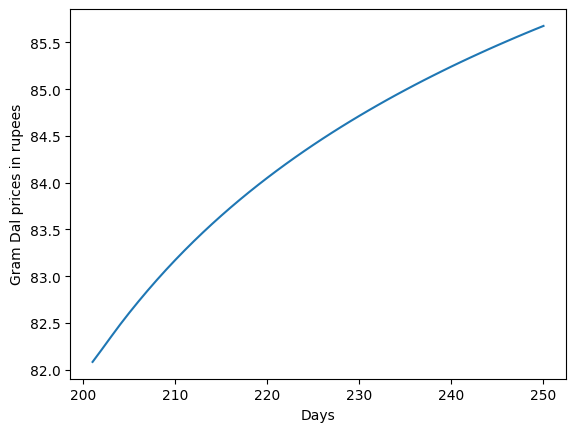

In [157]:
plt.plot(day_pred, scaler.inverse_transform(predicted_prices).flatten(), label="Predicted Data")
plt.xlabel('Days')
plt.ylabel(f'{x} prices in rupees')
plt.show()

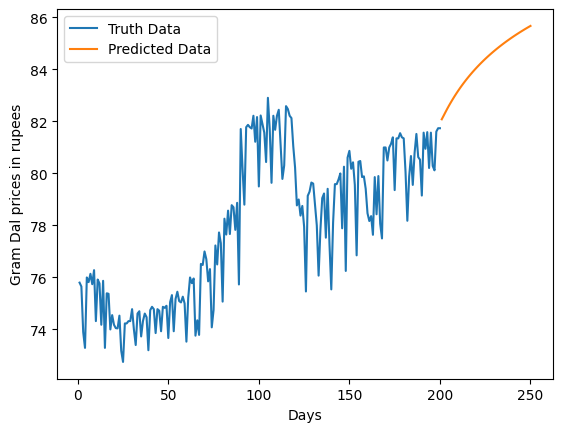

In [158]:
plt.plot(day_new, scaler.inverse_transform(test_data[(len(test_data) - look_back) : ]), label="Truth Data") #previous 100 data
plt.plot(day_pred, scaler.inverse_transform(predicted_prices).flatten(), label="Predicted Data")
plt.legend()
plt.xlabel('Days')
plt.ylabel(f'{x} prices in rupees')
plt.show()

In [131]:
pred_prices = scaler.inverse_transform(predicted_prices)
#pred_prices

In [132]:
print(f"The price of {x} at {days_to_pred}th day is {pred_prices[0][-1]:.2f} rupees")

The price of Gram Dal at 50th day is 84.78 rupees


### Work in Progress

In [87]:
pred_prices_1D = np.array(pred_prices).flatten().tolist()
pred_prices_1D

[82.25847733020784,
 82.39600217342378,
 82.52991211414339,
 82.60443550348283,
 82.96772301197053,
 82.97733557224275,
 82.94420009851457,
 83.2950053215027,
 83.36008489131929,
 83.54040986299516,
 83.68161869049074,
 83.62943702936174,
 83.6002244949341,
 83.75476044416429,
 84.09994286298753,
 84.18179005384447,
 84.24124568700792,
 84.3132028579712,
 84.26032584905626,
 84.23252892494203,
 84.16922056674959,
 84.26229298114778,
 84.2863594889641,
 84.34835755825044,
 84.33057069778444,
 84.42075073719026,
 84.56795382499696,
 84.64216804504396,
 84.72778415679933,
 84.77205085754396]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1511, 1) + inhomogeneous part.

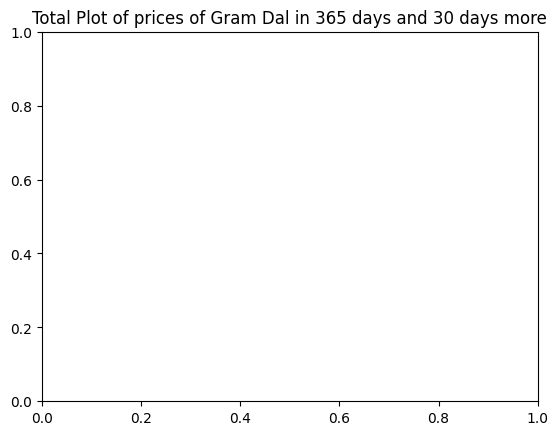

In [152]:
df3 = norm_df.tolist()
df3.extend(pred_prices)

plt.title(f'Total Plot of prices of {x} in 365 days and 30 days more')
plt.plot(scaler.inverse_transform(df3), label="Total Plot", c='black')
#plt.plot(pred_prices, label="Predicted Plot", c='orange')
plt.xlabel('Days')
plt.ylabel(f'{x} prices in rupees')
plt.legend()
plt.show()

In [ ]:
lst_output

[[0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229],
 [0.900459885597229]]

In [34]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [65]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [35]:
len(norm_df)

1461

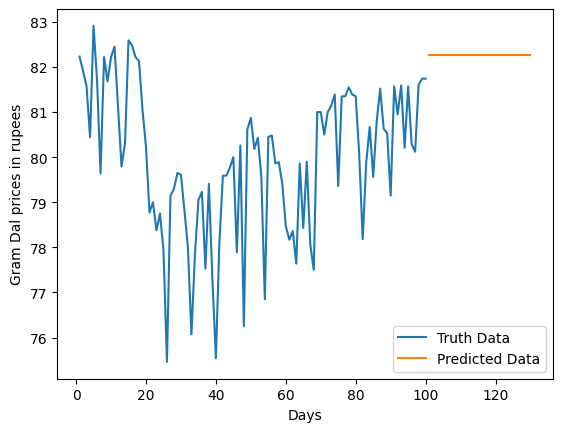

In [36]:
plt.plot(day_new, scaler.inverse_transform(norm_df[1361: ]), label="Truth Data") #previous 100 data
plt.plot(day_pred, scaler.inverse_transform(lst_output), label="Predicted Data")
plt.legend()
plt.xlabel('Days')
plt.ylabel(f'{x} prices in rupees')
plt.show()


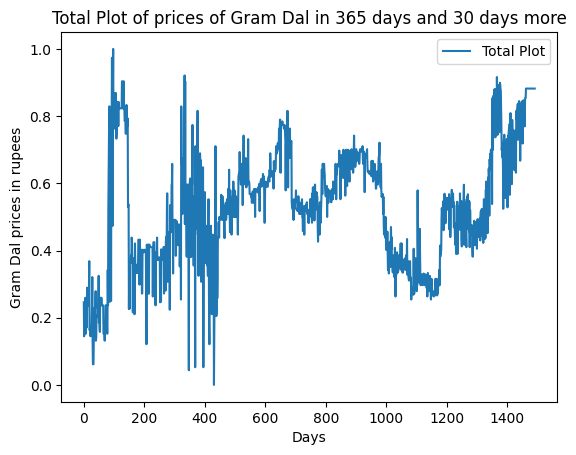

In [37]:
df3 = norm_df.tolist()
df3.extend(lst_output)

plt.title(f'Total Plot of prices of {x} in 365 days and 30 days more')
plt.plot(df3, label="Total Plot")
plt.xlabel('Days')
plt.ylabel(f'{x} prices in rupees')
plt.legend()
plt.show()